<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="360">

# EDA on IPL Data



## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [**Analysis based on Outlet metrics**](#section501)<br>
    - 5.1.1 [How many stores are actually owned and run by McDonald's?](#section50101)<br>
    - 5.1.2 [Which outlets generate maximum revenue for the company?](#section50102)<br>
    - 5.1.3 [Top 10 Outlets in terms of Profit](#section50103)<br>
    - 5.1.4 [Outlets with highest Number of Employees](#section50104)<br>
    - 5.1.5 [Where do you find the maximum footfall in McDonald's?](#section50105)<br><br>
  - 5.2 [**Analysis based on Nutritional Value**](#section502)<br>
      - 5.2.1 [Which is the most common category on menu?](#section50201)<br>
      - 5.2.2 [How many calories (energy) on an average are present in each category of McDonald's menu?](#section50202)<br>
      - 5.2.3 [Is there any difference in the nutritional value of a grilled vs crispy chicken?](#section50203)<br>
      - 5.2.4 [On an average, how much sugar consumption happens when you order Desserts, Beverages, Smoothies and Shakes?](#section50204)<br>
      - 5.2.5 [In what sort of foods and beverages do manufacturers include fiber?](#section50205)<br> 
      - 5.2.6 [How to select Nutritious and Non-Nutritious food from menu?](#section50206)<br> 
      - 5.2.7 [Which is the most proteinaceous item on the menu?](#section50207)<br> <br>
  - 5.3 [**Analysis based on Geographical Information**](#section503)<br>
    - 5.3.1 [Which city has the highest number of McDonald's outlets per capita?](#section50301)<br>
    - 5.3.2 [Which state has the highest number of McDonald's outlets per capita?](#section50302)<br>
    - 5.3.3 [Outlet locations in India](#section50303)<br>
    - 5.3.4 [Outlet locations in India](#section50304)<br><br>
  - 5.4 [**Analysis based on Outlet metrics and Nutritional value**](#section504)<br>
    - 5.4.1 [Which outlets have most nutritious item as their best selling item?](#section50401)<br>
    - 5.4.2 [What is the Revenue of the outlet based on the category of its best selling item?](#section50402)<br>
    - 5.4.3 [How much is the Total Selling Price of the outlet based on the category of its best selling item?](#section50403)<br>
    - 5.4.4 [How much is the Total Cost Price of the outlet based on the category of its best selling item?](#section50404)<br><br>
  - 5.5 [**Analysis based on Outlet Metrics and Geographical Information**](#section505)<br>
    - 5.5.1 [Where did McDonald's entered into Joint Venture to start their Outlets?](#section50501)<br>
    - 5.5.2 [Top 10 outlets in India and US based on revenue](#section50502)<br>
    - 5.5.3 [What is the mean revenue of outlets in each US state?](#section50503)<br>
    - 5.5.4 [How much is the Gross Profit Margin of each outlet?](#section50504)<br><br>
  - 5.6 [**Analysis based on Nutritional value and Geographical information**](#section506)<br>
    - 5.6.1 [Comparison of Nutritional content of each category between India and US](#section50601)<br>
    - 5.6.2 [How are Indian menu items compare to US menu items in terms of nutrition?](#section50602)<br><br>
  - 5.7 [**Analysis based on outlet metrics, menu items, and geographical information**](#section507)<br>
    - 5.7.1 [How is the revenue generation based on different menu items in India and US?](#section50701)<br><br>
6. [Conclusion](#section6)
  - 6.1 [Actionable Insights](#section601)

<a id=section1></a>
## 1. Problem Statement

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India.The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. The IPL is the most-attended cricket league in the world. By analysing the players on different aspects like Batting, Bowling and Fielding, let us try to find the value they add to their teams and thus the role they play in winning the tournament.

---

<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')

In [2]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

Requirement already up-to-date: plotly in c:\programdata\anaconda3\lib\site-packages (4.9.0)


In [3]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Load 1st Dataset matches

In [4]:
#Load 1st Dataset matches
df_matches=pd.read_csv('matches.csv')
df_matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               696 non-null    int64 
 1   season           696 non-null    int64 
 2   city             689 non-null    object
 3   date             696 non-null    object
 4   team1            696 non-null    object
 5   team2            696 non-null    object
 6   toss_winner      696 non-null    object
 7   toss_decision    696 non-null    object
 8   result           696 non-null    object
 9   dl_applied       696 non-null    int64 
 10  winner           693 non-null    object
 11  win_by_runs      696 non-null    int64 
 12  win_by_wickets   696 non-null    int64 
 13  player_of_match  693 non-null    object
 14  venue            696 non-null    object
 15  umpire1          695 non-null    object
 16  umpire2          695 non-null    object
 17  umpire3          60 non-null     ob

# Load 2nd Dataset deliveries

In [6]:
#Load 2nd Dataset deliveries
df_deliveries=pd.read_csv('deliveries.csv')
df_deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          164750 non-null  int64 
 1   inning            164750 non-null  int64 
 2   batting_team      164750 non-null  object
 3   bowling_team      164750 non-null  object
 4   over              164750 non-null  int64 
 5   ball              164750 non-null  int64 
 6   batsman           164750 non-null  object
 7   non_striker       164750 non-null  object
 8   bowler            164750 non-null  object
 9   is_super_over     164750 non-null  int64 
 10  wide_runs         164750 non-null  int64 
 11  bye_runs          164750 non-null  int64 
 12  legbye_runs       164750 non-null  int64 
 13  noball_runs       164750 non-null  int64 
 14  penalty_runs      164750 non-null  int64 
 15  batsman_runs      164750 non-null  int64 
 16  extra_runs        164750 non-null  int

<a id=section302></a>
### 3 Pandas Profiling before Data Preprocessing

In [8]:
# To install pandas profiling please run this command.

#!pip install pandas-profiling --upgrade

In [9]:
#import pandas_profiling

In [10]:
# Saving the output as profiling_before_preprocessing_matches.html

#profile_matches = df_matches.profile_report(title='Pandas Profiling before matches Data Preprocessing')
#profile_matches.to_file(output_file="profiling_before_preprocessing_matches.html")

In [11]:
# Saving the output as profiling_before_preprocessing_deliveries.html

#profile_deliveries = df_deliveries.profile_report(title='Pandas Profiling before deliveries Data Preprocessing')
#profile_deliveries.to_file(output_file="profiling_before_preprocessing_deliveries.html")

---

<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.


- In order to avoid any errors, please run **Pandas Profiling** before running the code below.

In [12]:
#matches - Umpire3 most of the values are missing so we are dropping the column
df_matches.drop(['umpire3'],axis=1,inplace=True)

In [13]:
#deliveries - filling all the NaN values with 0
df_deliveries.fillna(0, inplace=True)

In [14]:
df_matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [15]:
#Replace the team name with their abbreviations
df_matches.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],['SRH', 'MI', 'GL','RPS', 'RCB',
       'KKR', 'DD', 'KXIP','CSK', 'RR', 'DC','KTK', 'PW', 'RPS'],inplace=True)

In [16]:
df_deliveries.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],['SRH', 'MI', 'GL','RPS', 'RCB',
       'KKR', 'DD', 'KXIP','CSK', 'RR', 'DC','KTK', 'PW', 'RPS'],inplace=True)

In [17]:
print('Total Matches Played:',df_matches.shape[0])
print(' \n Venues Played At:',df_matches['city'].unique())     
print(' \n Teams :',df_matches['team1'].unique())

Total Matches Played: 696
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']
 
 Teams : ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']


In [18]:
print('Total venues played at:',df_matches['city'].nunique())
print('\nTotal umpires ',df_matches['umpire1'].nunique())

Total venues played at: 32

Total umpires  55


In [19]:
print(df_matches['player_of_match'].value_counts())
print((df_matches['player_of_match'].value_counts()).idxmax(),' : has got most man of the match awards')
print((df_matches['player_of_match'].value_counts()).max(),' : times has won man of the match awards')

CH Gayle           20
AB de Villiers     18
YK Pathan          16
RG Sharma          16
DA Warner          15
                   ..
GD McGrath          1
S Nadeem            1
LJ Wright           1
JEC Franklin        1
KMDN Kulasekara     1
Name: player_of_match, Length: 214, dtype: int64
CH Gayle  : has got most man of the match awards
20  : times has won man of the match awards


In [20]:
print(((df_matches['winner']).value_counts()).idxmax(),': has the highest number of match winning team')
print(((df_matches['winner']).value_counts()).max(),': times MI team won matches')

MI : has the highest number of match winning team
98 : times MI team won matches


In [21]:
#The Team which has won with the highest run difference
df_m=df_matches.iloc[[df_matches['win_by_runs'].idxmax()]]
df_m[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


In [22]:
#The Team which has won with the highest wins by wickets
df_m=df_matches.iloc[[df_matches['win_by_wickets'].idxmax()]]
df_m[['season','date','team1','team2','winner','win_by_wickets']]

,season,date,team1,team2,winner,win_by_wickets
2,2017,2017-04-07,GL,KKR,KKR,10


In [23]:
#Toss decisions out of 696 matches
print('Toss Decisions in %\n',((df_matches['toss_decision']).value_counts())/696*100)
print('Toss Decisions: ',(df_matches['toss_decision']).value_counts())

Toss Decisions in %
 field    59.33908
bat      40.66092
Name: toss_decision, dtype: float64
Toss Decisions:  field    413
bat      283
Name: toss_decision, dtype: int64


### Toss Decisions across Seasons

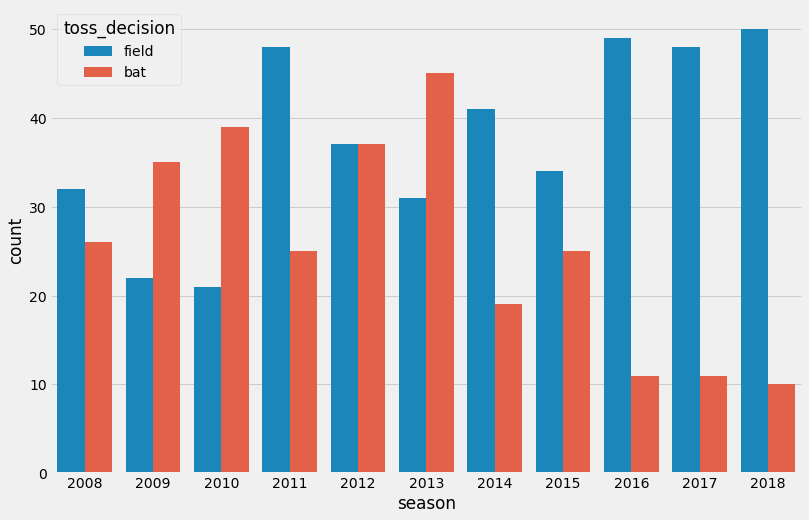

In [24]:
mlt.subplots(figsize=(12,8))
sns.countplot(x='season',hue='toss_decision', data=df_matches)
mlt.show()

The decision for batting or fielding varies largely across the seasons. In some seasons, the probablity that toss winners opt for batting is high, while it is not the case in other seasons. In 2018, the majority of toss winners opted for fielding.

### Maximum Toss Winners

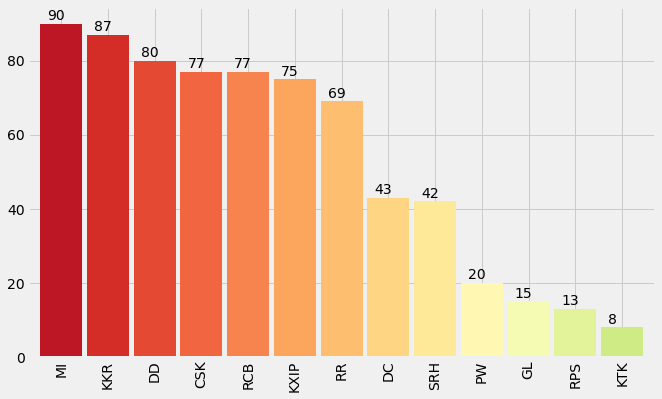

In [25]:
mlt.subplots(figsize=(10,6))
ax=df_matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
mlt.show()

### Total Matches vs Wins for Teams

In [26]:
matches_played_byteams=pd.concat([df_matches['team1'],df_matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=df_matches['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)

trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['Total Matches'],
    name='Total Matches'
)
trace2 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['wins'],
    name='Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')


### Is Toss Winner Also the Match Winner?

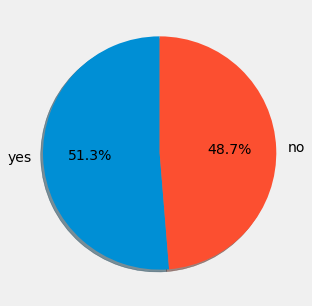

In [27]:
df=df_matches[df_matches['toss_winner']==df_matches['winner']]
slices=[len(df),(696-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%')
fig = mlt.gcf()
fig.set_size_inches(5,5)
mlt.show()

### Matches played across each season

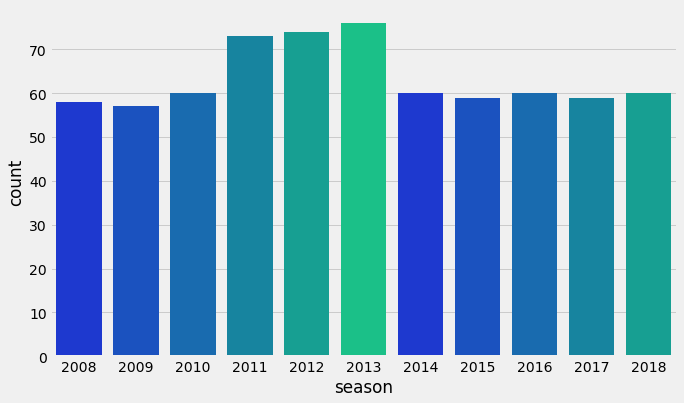

In [28]:
mlt.subplots(figsize=(10,6))
#countplot automatically counts the frequency of an item
sns.countplot(x='season',data=df_matches,palette=sns.color_palette('winter'))  
mlt.show()

### Runs Across the Seasons

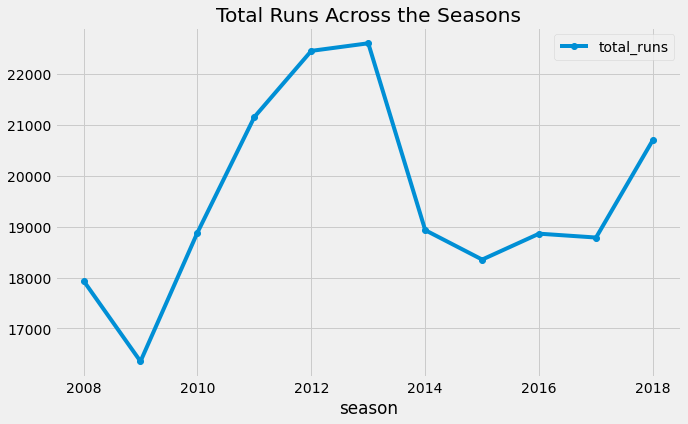

In [29]:
batsmen = df_matches[['id','season']].merge(df_deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Total Runs Across the Seasons')
mlt.show()

### Average runs per match in each Season

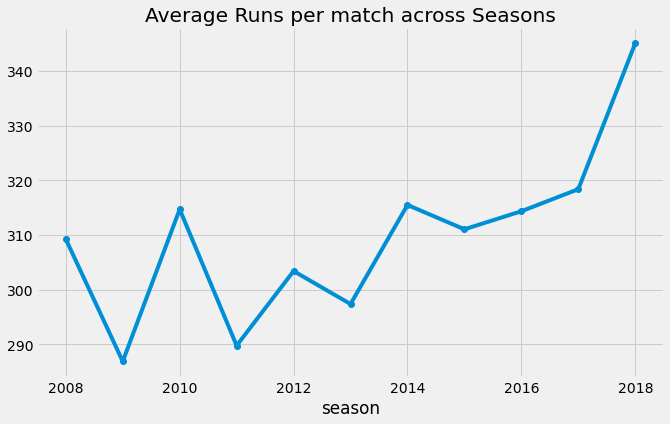

In [30]:
avgruns_each_season=df_matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Average Runs per match across Seasons')
mlt.show()

### Sixes and Fours Across the Season

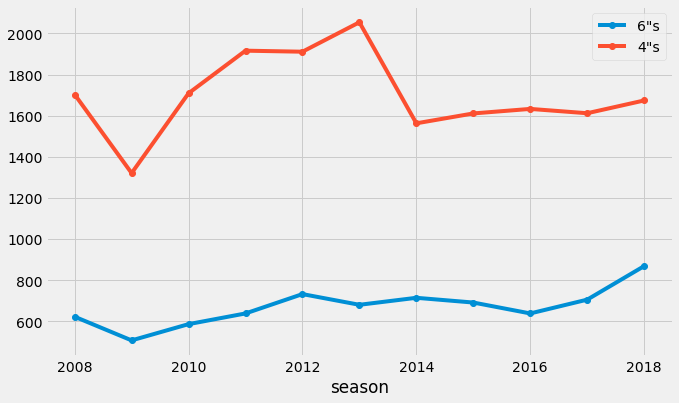

In [31]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()

### Runs Per Over By Teams Across Seasons

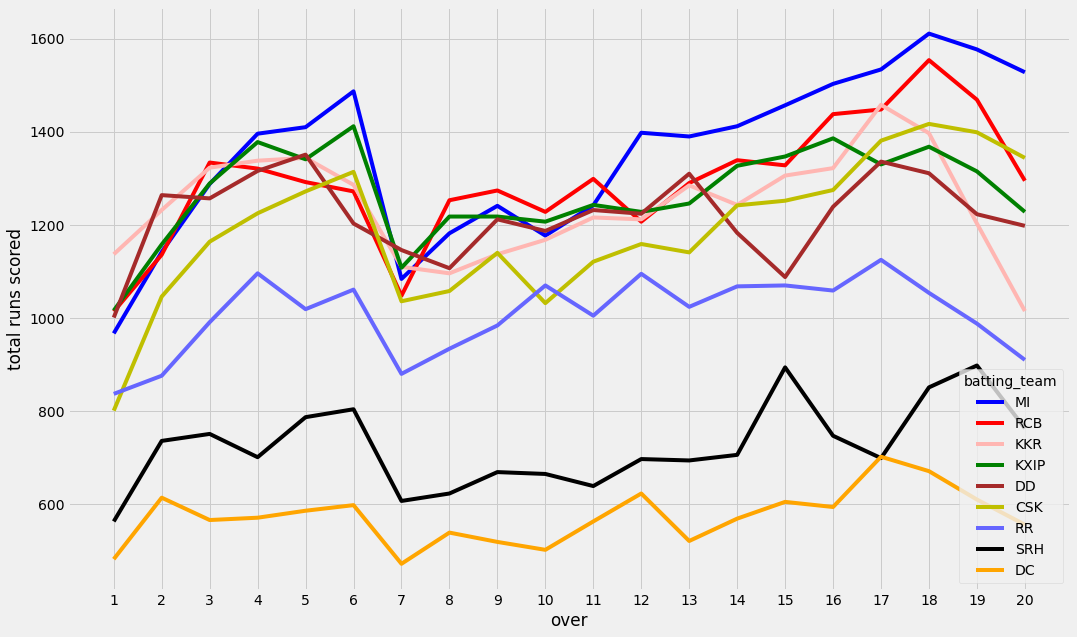

In [32]:
runs_per_over = df_deliveries.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) #plotting graphs for teams that have played more than 100 matches
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
mlt.xticks(x)
mlt.ylabel('total runs scored')
fig=mlt.gcf()
fig.set_size_inches(16,10)
mlt.show()

### Matches in Grounds

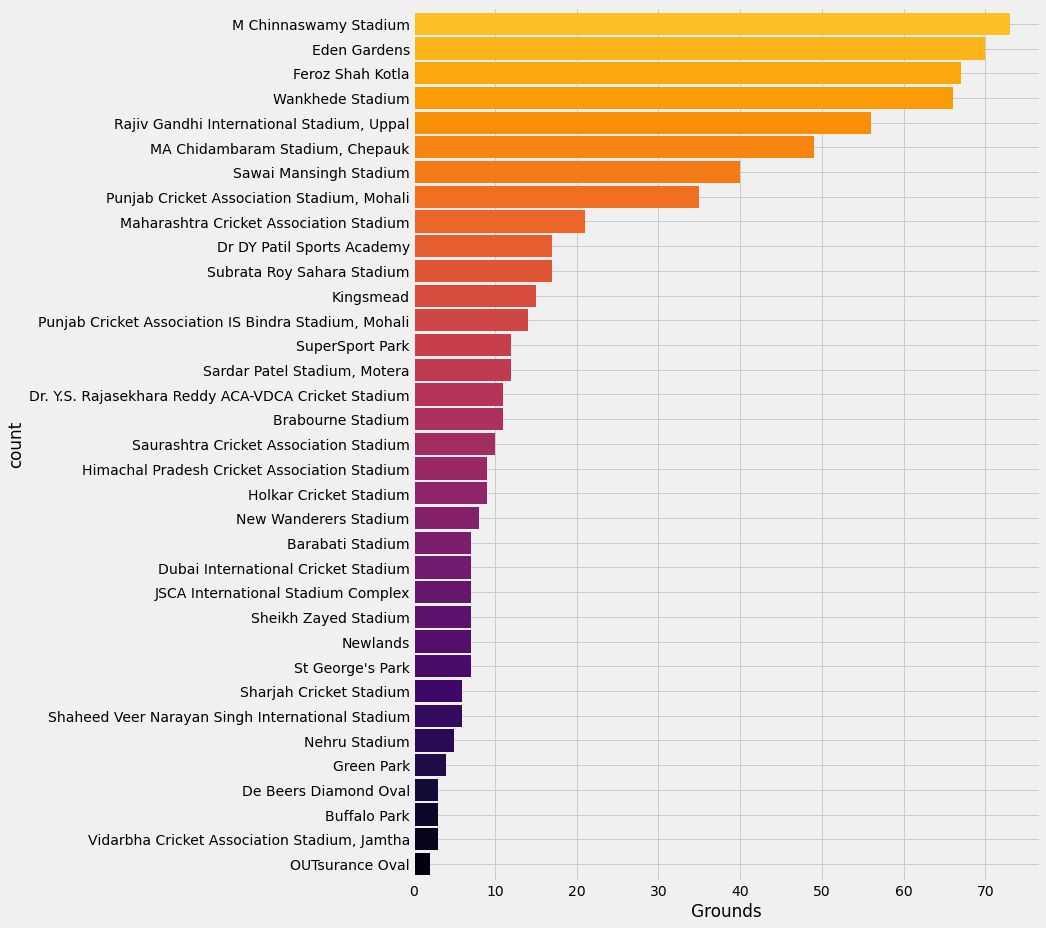

In [33]:
mlt.subplots(figsize=(10,15))
ax = df_matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
mlt.show()

### Maximum Man Of Matches

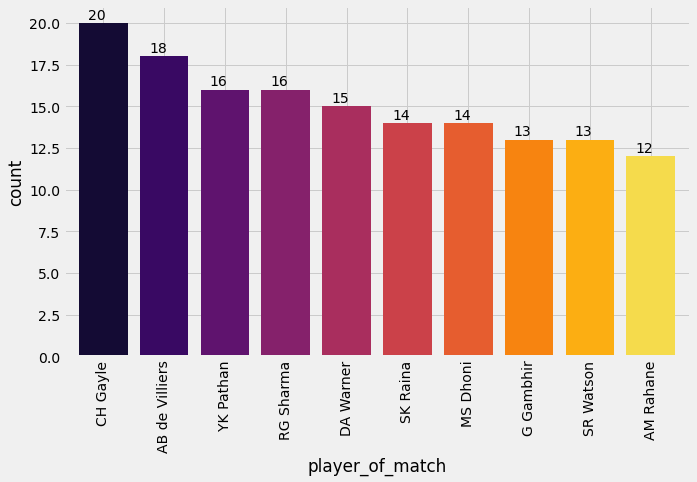

In [34]:
mlt.subplots(figsize=(10,6))
ax = df_matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

### Winners by Year

In [35]:
print('Winners By Years')
for i in range(2008,2019):
    df=((df_matches[df_matches['season']==i]).iloc[-1]) 
    print(df[[1,10]].values)
#getting the last match in every season since the last match will be the final match for the season

Winners By Years
[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']
[2017 'MI']
[2018 'CSK']


### Umpire in most number of matches

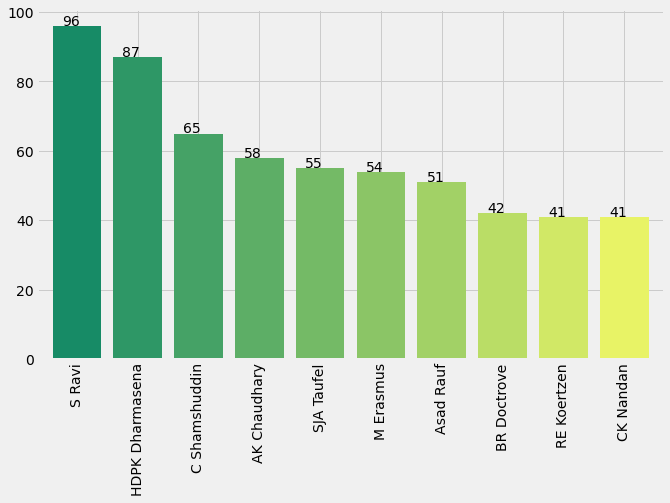

In [36]:
mlt.subplots(figsize=(10,6))
ump=pd.concat([df_matches['umpire1'],df_matches['umpire2']]) 
ax=ump.value_counts().head(10).plot.bar(width=0.8,color=sns.color_palette('summer',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

### Team1 vs Team2

### MI vs KKR

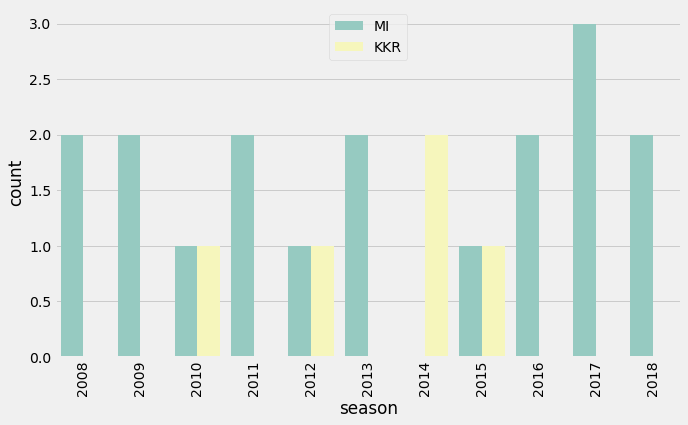

In [37]:
def team1_vs_team2(team1,team2):
    mt1=df_matches[((df_matches['team1']==team1)|(df_matches['team2']==team1))&((df_matches['team1']==team2)|(df_matches['team2']==team2))]
    sns.countplot(x='season', hue='winner',data=mt1,palette='Set3')
    mlt.xticks(rotation='vertical')
    leg = mlt.legend( loc = 'upper center')
    fig=mlt.gcf()
    fig.set_size_inches(10,6)
    mlt.show()
team1_vs_team2('KKR','MI')

### MI vs CSK

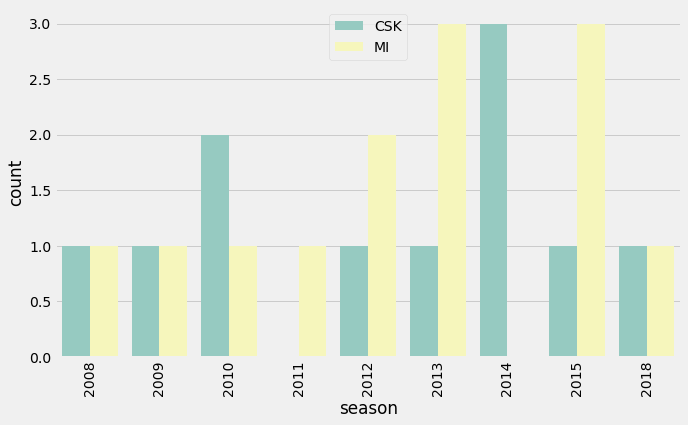

In [38]:
team1_vs_team2('CSK','MI')

### Matches Won By A Team Against Other Teams

In [39]:
def comparator(team1):
    teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
    teams.remove(team1)
    opponents=teams.copy()
    mt1=df_matches[((df_matches['team1']==team1)|(df_matches['team2']==team1))]
    for i in opponents:
        mask = (((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T
        print(mt2)
    
comparator('MI')

        MI  KKR
winner  18    5
        MI  RCB
winner  14    9
        MI  DC
winner   6   4
        MI  CSK
winner  13   11
        MI  RR
winner  10   8
        DD  MI
winner  11  11
        GL  MI
winner   2   2
        MI  KXIP
winner  12    10
        SRH  MI
winner    7   5
        RPS  MI
winner    4   2
        KTK
winner    1
        MI  PW
winner   5   1


### Score Distribution For Teams by Innings

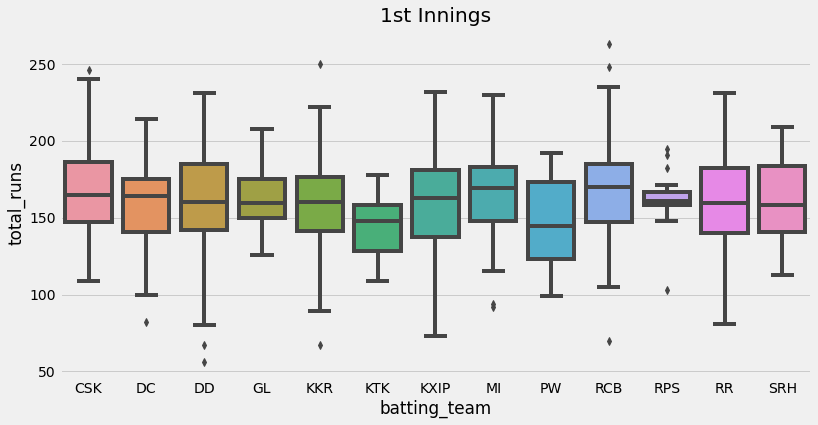

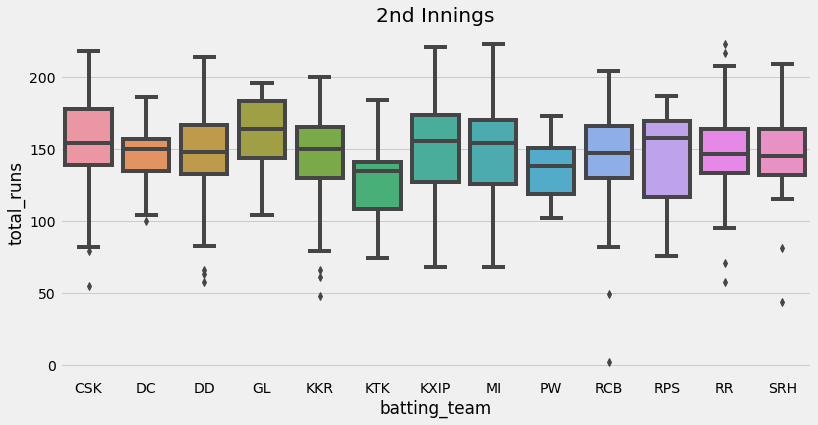

In [40]:
mlt.subplots(figsize=(12,6))
xyz=df_deliveries.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id',axis=1,inplace=True)
xyz=xyz.sort_values(by=['batting_team','total_runs'],ascending=True)
score_1_inning=xyz[xyz['inning']==1]
score_2_inning=xyz[xyz['inning']==2]
sns.boxplot(x='batting_team',y='total_runs',data=score_1_inning).set_title('1st Innings')
mlt.show()
sns.boxplot(x='batting_team',y='total_runs',data=score_2_inning).set_title('2nd Innings')
fig=mlt.gcf()
fig.set_size_inches(12,6)

### 200+ Scores

In [41]:
high_scores=df_deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,RCB,PW,263
1370,7937,1,KKR,KXIP,250
1250,620,1,RCB,GL,248
416,206,1,CSK,RR,246
122,61,1,CSK,KXIP,240
1134,562,1,RCB,MI,235
596,296,1,KXIP,RCB,232
522,259,1,DD,KXIP,231
981,486,1,KXIP,CSK,231
1304,7904,1,RR,RCB,231


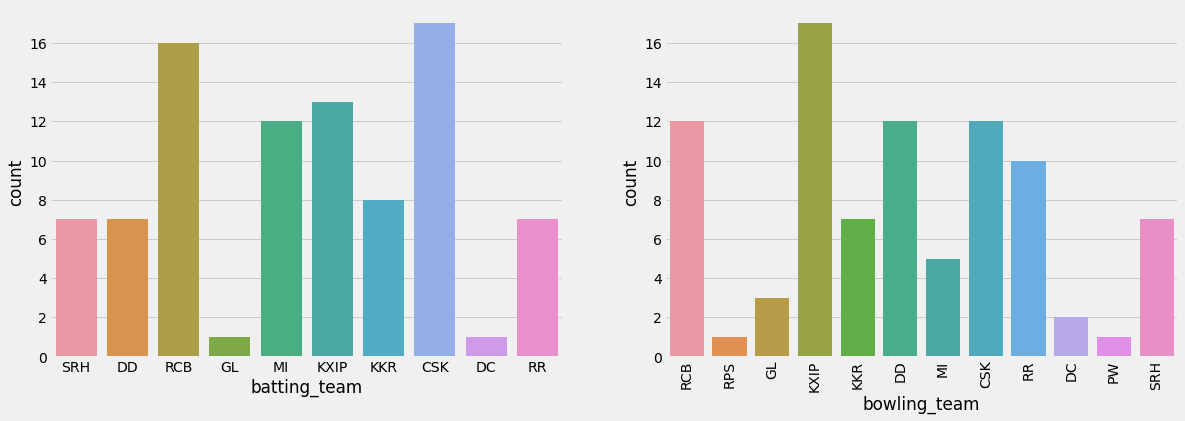

In [42]:
fig, ax =mlt.subplots(1,2)
sns.countplot(high_scores['batting_team'],ax=ax[0])
sns.countplot(high_scores['bowling_team'],ax=ax[1])
mlt.xticks(rotation=90)
fig=mlt.gcf()
fig.set_size_inches(18,6)
mlt.show()

In [43]:
teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
print('Teams who have not ever scored 200 runs',list(set(teams)-set(high_scores['batting_team'])))
print('Teams who have not conceeded over 200 while bowling',list(set(teams)-set(high_scores['bowling_team'])))

Teams who have not ever scored 200 runs ['RPS', 'PW', 'KTK']
Teams who have not conceeded over 200 while bowling ['KTK']


In [44]:
high=df_deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high.set_index(['match_id'],inplace=True)
high['total_runs'].max()
high.columns
high=high.rename(columns={'total_runs':'count'})
high=high[high['count']>=200].groupby(['inning','batting_team','bowling_team']).count()
high

count
inning batting_team bowling_team       
1      CSK          DD                2
                    KKR               1
                    KXIP              2
                    MI                1
                    RCB               1
...                                 ...
2      RCB          SRH               1
       RR           CSK               1
                    DC                1
                    MI                1
       SRH          RCB               1

[65 rows x 1 columns]

### Chances of chasing 200+ target

In [45]:
high_scores=df_deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores1=high_scores[high_scores['inning']==1]
high_scores2=high_scores[high_scores['inning']==2]
high_scores1=high_scores1.merge(high_scores2[['match_id','inning', 'total_runs']], on='match_id')
high_scores1.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)
high_scores1=high_scores1[high_scores1['inning1_runs']>=200]
high_scores1['is_score_chased']=1
high_scores1['is_score_chased'] = np.where(high_scores1['inning1_runs']<=high_scores1['inning2_runs'], 
                                           'yes', 'no')
high_scores1.head()

,match_id,inning_1,batting_team,bowling_team,inning1_runs,inning_2,inning2_runs,is_score_chased
0,1,1,SRH,RCB,207,2,172,no
8,9,1,DD,RPS,205,2,108,no
19,20,1,RCB,GL,213,2,192,no
31,32,1,SRH,KXIP,207,2,181,no
35,36,1,SRH,KKR,209,2,161,no


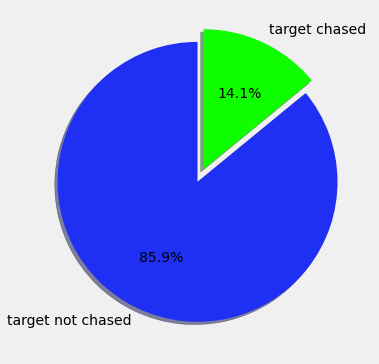

In [46]:
slices=high_scores1['is_score_chased'].value_counts().reset_index().is_score_chased
list(slices)
labels=['target not chased','target chased']
mlt.pie(slices,labels=labels,colors=['#1f2ff3', '#0fff00'],startangle=90,shadow=True,explode=(0,0.1),autopct='%1.1f%%')
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

### Batsman Comparator
I have created a function that compares 2 batsman based on their respective stats like runs or strike rate etc. First lets create a dataframe from where we will be taking all that values for comparison.

In [47]:
balls=df_deliveries.groupby(['batsman'])['ball'].count().reset_index()
runs=df_deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)
sixes=df_deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=df_deliveries.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
balls['strike_rate']=balls['ball_y']/balls['ball_x']*100
balls=balls.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
balls=balls.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=df_deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman','batting_team'])['batsman_runs'].max().reset_index()
balls=balls.merge(compare,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batting_team':'Team','batsman_runs':'Highest_score'},axis=1,inplace=True)
balls.head()

,batsman,balls,runs,strike_rate,6's,4's,Team,Highest_score
0,A Ashish Reddy,196,280,142.857143,16,15,DC,10
1,A Ashish Reddy,196,280,142.857143,16,15,SRH,36
2,A Chandila,7,4,57.142857,0,0,RR,4
3,A Chopra,75,53,70.666667,7,0,KKR,24
4,A Choudhary,20,25,125.000000,1,1,RCB,15


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



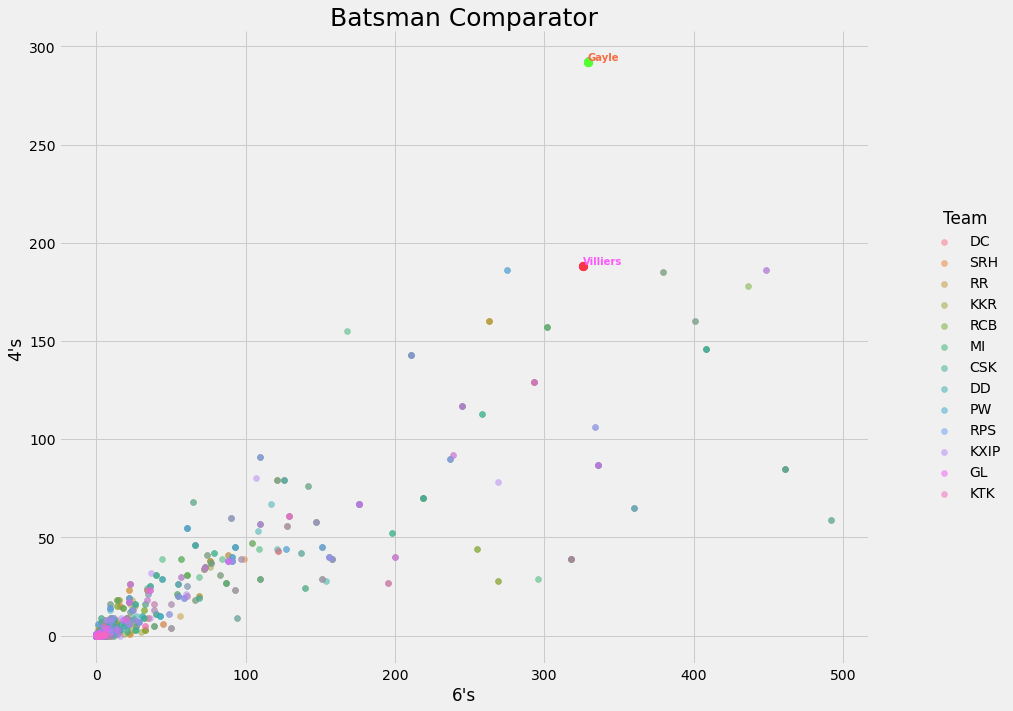

In [48]:
def batsman_comparator(stat1,stat2,batsman1,batsman2):
    sns.FacetGrid(balls,hue='Team',size=8).map(mlt.scatter, stat1,stat2, alpha=0.5).add_legend()
    bats1=balls[balls['batsman'].str.contains(batsman1)].sort_values(by=stat1,ascending=False)
    bats2=balls[balls['batsman'].str.contains(batsman2)].sort_values(by=stat1,ascending=False)
    mlt.scatter(bats1[stat1],bats1[stat2]-1,s=75,c='#55ff33')
    mlt.text(x=bats1[stat1].values[0],y=bats1[stat2].values[0],s=batsman1,
            fontsize=10, weight='bold', color='#f46d43')
    mlt.scatter(bats2[stat1],bats2[stat2],s=75,c='#f73545')
    mlt.text(x=bats2[stat1].values[0],y=bats2[stat2].values[0]+1,s=batsman2, 
            fontsize=10, weight='bold', color='#ff58fd')
    mlt.gcf().set_size_inches(15,10)
    mlt.title('Batsman Comparator',size=25)
    mlt.show()

batsman_comparator("6's","4's",'Gayle','Villiers') 
#comparing gayle and de-villiers based on their respective boundaries

### Dhoni Vs Kohli

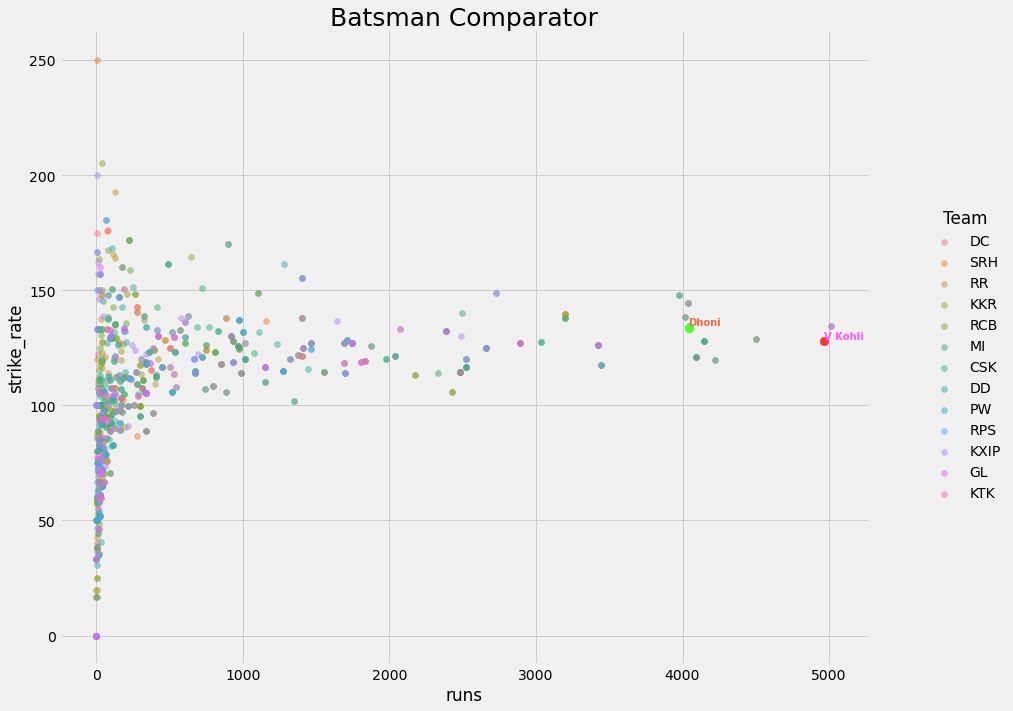

In [49]:
batsman_comparator("runs","strike_rate",'Dhoni','V Kohli')

### Top Batsmen

Top 10 Batsman

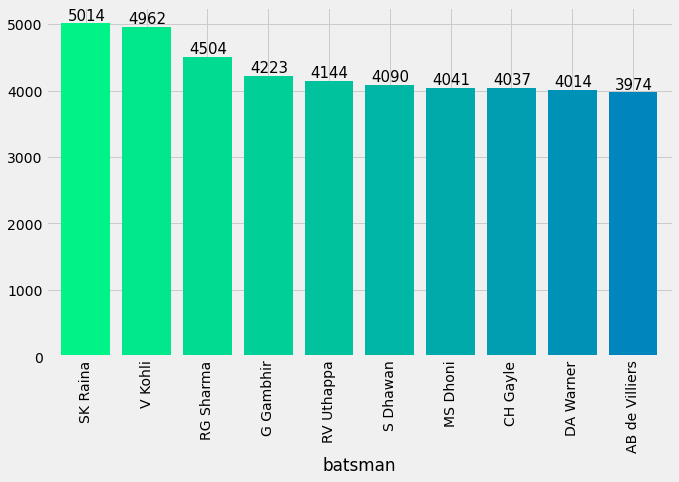

In [50]:
mlt.subplots(figsize=(10,6))
max_runs=df_deliveries.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
mlt.show()

### Top Batsman's with 1's, 2's, 3's, 4's

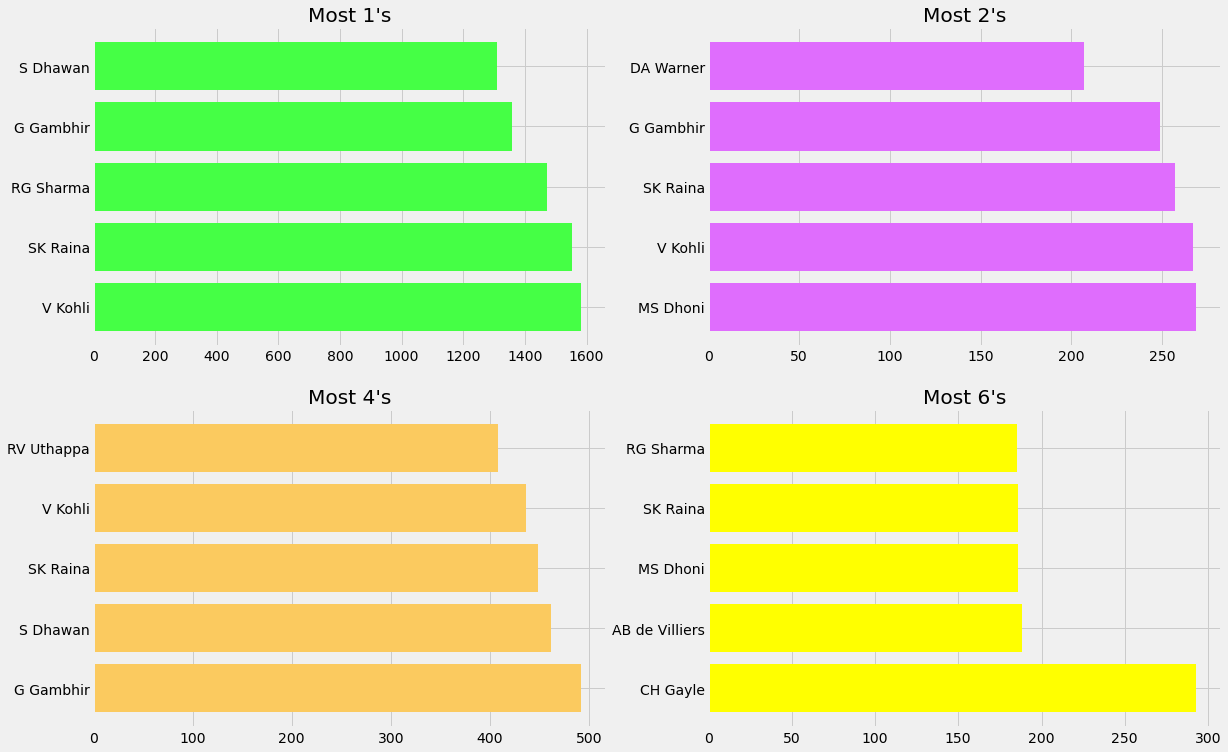

In [51]:
toppers=df_deliveries.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=mlt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
mlt.show()

### Observations:

1. Kohli has scored the maximum 1's 
2. Dhoni has the maximum 2's . 
3. Gambhir has the maximum 4's. 
4. C Gayle has the maximum 6's and he leads by a big margin. 

### Top Individual Scores

In [52]:
top_scores = df_deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
#top_scores=top_scores[top_scores['batsman_runs']>100]
top_scores.sort_values('batsman_runs', ascending=0).head(10)
top_scores.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
10149,7935,RR Pant,DD,130
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
10417,7953,SR Watson,CSK,121


### Individual Scores By Top Batsman each Inning

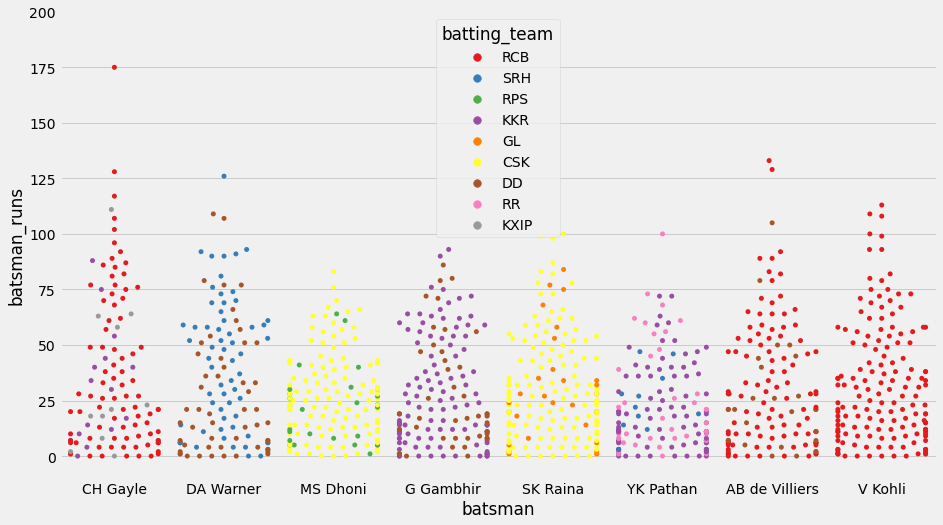

In [53]:
swarm=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner']
scores = df_deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[top_scores['batsman'].isin(swarm)]
sns.swarmplot(x='batsman',y='batsman_runs',data=scores,hue='batting_team',palette='Set1')
fig=mlt.gcf()
fig.set_size_inches(14,8)
mlt.ylim(-10,200)
mlt.show()

### Runs Scored By Batsman Across Seasons

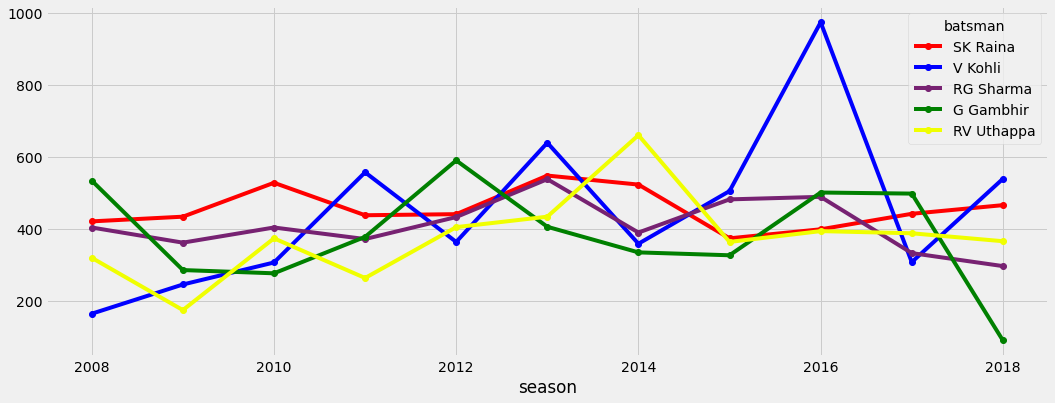

In [54]:
a=batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
a=a.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
a['Total']=a.sum(axis=1)
a=a.sort_values(by='Total',ascending=0)[:5]
a.drop('Total',axis=1,inplace=True)
a.T.plot(color=['red','blue','#772272','green','#f0ff00'],marker='o')
fig=mlt.gcf()
fig.set_size_inches(16,6)
mlt.show()

### How do the top batsmen score 

In [55]:
a=batsmen.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
b=max_runs.sort_values(ascending=False)[:10].reset_index()
c=b.merge(a,left_on='batsman',right_on='batsman',how='left')
c.drop('batsman_runs_x',axis=1,inplace=True)
c.set_index('batsman',inplace=True)
c.columns=['type','count']
c=c[(c['type']==1)|(c['type']==2)|(c['type']==4)|(c['type']==6)]
cols=['type','count']
c.reset_index(inplace=True)
c=c.pivot('batsman','type','count')

trace1 = go.Bar(
    y=c.index, x=c[6],
    name="6's",
    orientation = 'h',
    marker = dict(color = 'rgba(178, 78, 139, 0.6)',
        line = dict(color = 'rgba(178, 78, 139, 1.0)',
            width = 3)
    )
)
trace2 = go.Bar(
    y=c.index, x=c[4],
    name="4's",
    orientation = 'h',
    marker = dict(color = 'rgba(58, 71, 80, 0.6)',
        line = dict(color = 'rgba(58, 71, 80, 1.0)',
            width = 3)
    )
)

trace3 = go.Bar(
    y=c.index, x=c[2],
    name="2's",
    orientation = 'h',
    marker = dict(color = 'rgba(101, 178, 139, 0.6)',
        line = dict(color = 'rgba(101, 178, 139, 1.0)',
            width = 3)
    )
)
trace4 = go.Bar(
    y=c.index, x=c[1],
    name="1's",
    orientation = 'h',
    marker = dict(color = 'rgba(208, 105, 80, 0.6)',
        line = dict(color = 'rgba(208, 105, 80, 1.0)',
            width = 3)
    )
)

data = [trace1, trace2,trace3,trace4]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')

### Frequency of Scores

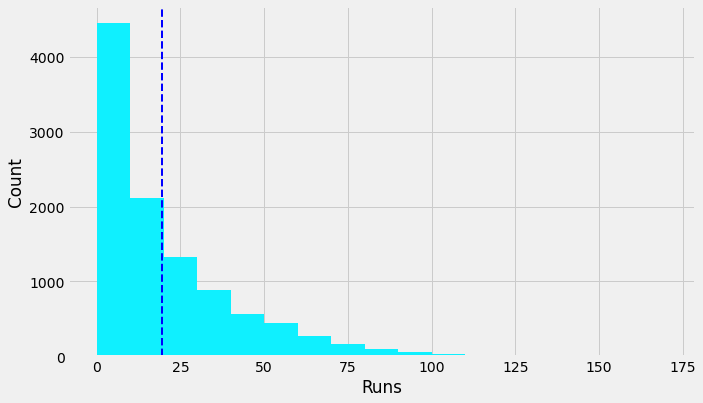

In [56]:
mlt.subplots(figsize=(10,6))
bins=range(0,180,10)
mlt.hist(top_scores["batsman_runs"],bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
mlt.xlabel('Runs')
mlt.ylabel('Count')
mlt.axvline(top_scores["batsman_runs"].mean(), color='b', linestyle='dashed', linewidth=2)
mlt.plot()
mlt.show()

### Orange Caps Each Season(Highest Run Getter per Season) 

In [57]:
orange=df_matches[['id','season']]
orange=orange.merge(df_deliveries,left_on='id',right_on='match_id',how='left')
orange=orange.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
orange=orange.sort_values('batsman_runs',ascending=0)
orange=orange.drop_duplicates(subset=["season"],keep="first")
orange.sort_values(by='season')

trace1 = go.Bar(
    x=orange['season'].values,
    y=orange['batsman_runs'].values,
    name='Total Matches',
    text=orange['batsman'].values,
    marker=dict(
        color='rgb(255,140,0)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=1
)


layout = go.Layout(
    title='Orange-Cap Holders',
)
data=[trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

### Top Bowlers

Highest Wicket Taker

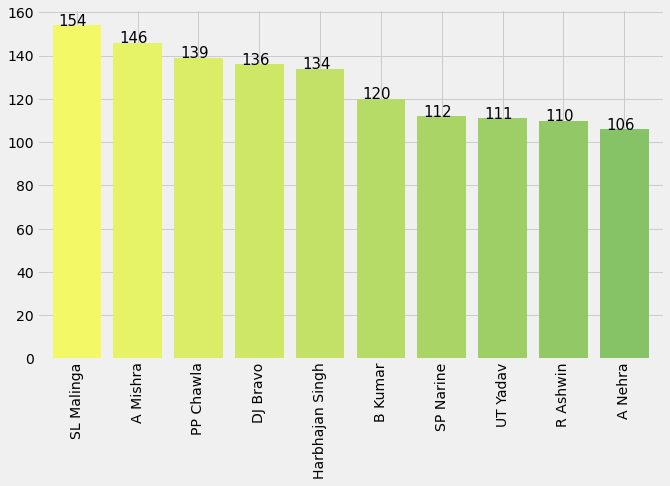

In [58]:
mlt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
#since run-out is not creditted to the bowler
ct=df_deliveries[df_deliveries["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color=sns.color_palette('summer_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()),fontsize=15)
mlt.show()

### Maximum Overs Bowled by players

In [59]:
eco=df_deliveries.groupby(['bowler']).sum()
eco['total balls']=df_deliveries['bowler'].value_counts()
eco['overs']=(eco['total balls']//6)
eco[eco['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

,bowler,overs
0,Harbhajan Singh,530
1,A Mishra,488
2,PP Chawla,481
3,SL Malinga,449
4,R Ashwin,445


In [60]:
eco['economy']=(eco['total_runs']/(eco['overs']))
eco[(eco['overs']>300)].sort_values('economy')[:10].economy.reset_index().T

,0,1,2,3,4,5,6,7,8,9
bowler,DW Steyn,SP Narine,R Ashwin,SL Malinga,Harbhajan Singh,B Kumar,A Mishra,PP Ojha,Z Khan,P Kumar
economy,6.6156,6.63824,6.68539,6.75724,7.0283,7.12564,7.32787,7.40432,7.54617,7.61276


### Top 20 Bowlers

In [61]:
bowlers=df_deliveries.groupby('bowler').sum().reset_index()
bowl=df_deliveries['bowler'].value_counts().reset_index()
bowlers=bowlers.merge(bowl,left_on='bowler',right_on='index',how='left')
bowlers=bowlers[['bowler_x','total_runs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','total_runs':'runs_given','bowler_y':'balls'},axis=1,inplace=True)
bowlers['overs']=(bowlers['balls']//6)
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
ct=df_deliveries[df_deliveries["dismissal_kind"].isin(dismissal_kinds)]
ct=ct['bowler'].value_counts()[:20].reset_index()
bowlers=bowlers.merge(ct,left_on='bowler',right_on='index',how='left').dropna()
bowlers=bowlers[['bowler_x','runs_given','overs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','bowler_y':'wickets'},axis=1,inplace=True)
bowlers['economy']=(bowlers['runs_given']/bowlers['overs'])
bowlers.head()

,bowler,runs_given,overs,wickets,economy
6,A Mishra,3576,488,146.0,7.327869
8,A Nehra,2537,329,106.0,7.711246
51,B Kumar,2779,390,120.0,7.125641
91,DJ Bravo,3375,408,136.0,8.272059
106,DW Steyn,2375,359,92.0,6.615599


In [62]:
trace = go.Scatter(
    y = bowlers['wickets'],
    x = bowlers['bowler'],
    mode='markers',
    marker=dict(
        size= bowlers['wickets'].values,
        color = bowlers['economy'].values,
        colorscale='Viridis',
        showscale=True,
        colorbar = dict(title = 'Economy'),
    ),
    text = bowlers['overs'].values
)
data = [(trace)]

layout= go.Layout(
    autosize= True,
    title= 'Top 20 Wicket Taking Bowlers',
    hovermode= 'closest',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        title='Bowlers'
    ),
    yaxis=dict(
        title= 'Wickets Taken',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

### Highest Dismissals for a Batsman by a Bowler

In [64]:
gayle=df_deliveries[df_deliveries['batsman']=='CH Gayle']
gayle=gayle[gayle['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
gayle=gayle.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
gayle['batsman']='CH Gayle'

kohli=df_deliveries[df_deliveries['batsman']=='V Kohli']
kohli=kohli[kohli['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
kohli=kohli.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
kohli['batsman']='V Kohli'


raina=df_deliveries[df_deliveries['batsman']=='SK Raina']
raina=raina[raina['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
raina=raina.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
raina['batsman']='SK Raina'

abd=df_deliveries[df_deliveries['batsman']=='AB de Villiers']
abd=abd[abd['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
abd=abd.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
abd['batsman']='AB de Villiers'

msd=df_deliveries[df_deliveries['batsman']=='MS Dhoni']
msd=msd[msd['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
msd=msd.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
msd['batsman']='MS Dhoni'


gg=df_deliveries[df_deliveries['batsman']=='G Gambhir']
gg=gg[gg['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
gg=gg.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
gg['batsman']='G Gambhir'

rohit=df_deliveries[df_deliveries['batsman']=='RG Sharma']
rohit=rohit[rohit['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
rohit=rohit.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
rohit['batsman']='RG Sharma'

uthapa=df_deliveries[df_deliveries['batsman']=='RV Uthappa']
uthapa=uthapa[uthapa['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
uthapa=uthapa.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
uthapa['batsman']='RV Uthappa'

dhawan=df_deliveries[df_deliveries['batsman']=='S Dhawan']
dhawan=dhawan[dhawan['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
dhawan=dhawan.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
dhawan['batsman']='S Dhawan'

warn=df_deliveries[df_deliveries['batsman']=='DA Warner']
warn=warn[warn['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
warn=warn.groupby('bowler').count().sort_values(by='dismissal_kind',ascending=0).dismissal_kind[:1].reset_index()
warn['batsman']='DA Warner'

new = gayle.append([kohli,raina,abd,msd,gg,rohit,uthapa,dhawan,warn])
new = new[['batsman','bowler','dismissal_kind']]
new.columns=['batsman','bowler','No_of_Dismissals']
new

,batsman,bowler,No_of_Dismissals
0,CH Gayle,R Ashwin,4
0,V Kohli,A Nehra,6
0,SK Raina,Harbhajan Singh,5
0,AB de Villiers,PP Chawla,4
0,MS Dhoni,Z Khan,7
0,G Gambhir,Z Khan,6
0,RG Sharma,SP Narine,6
0,RV Uthappa,R Ashwin,5
0,S Dhawan,Z Khan,4
0,DA Warner,L Balaji,3


### Frequency Of Economy

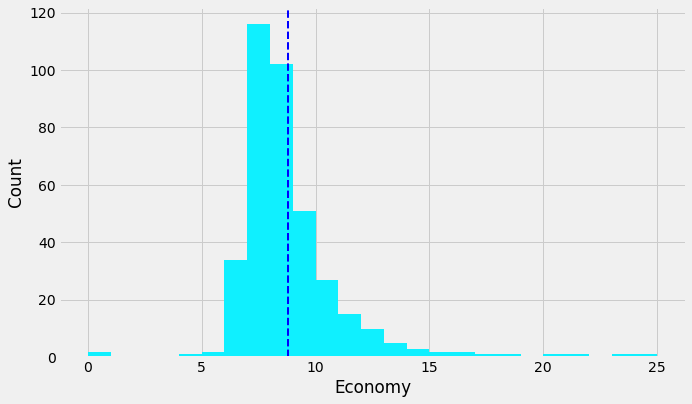

In [67]:
mlt.subplots(figsize=(10,6))
eco.replace([np.inf, -np.inf], np.nan,inplace=True)
eco.fillna(0,inplace=True)
bins=range(0,26)
mlt.hist(eco['economy'],bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
mlt.xlabel('Economy')
mlt.ylabel('Count')
mlt.axvline(eco["economy"].mean(), color='b', linestyle='dashed', linewidth=2)
mlt.plot()
mlt.show()

### Purple Caps Each Season (Maximum Wickets By Bowler per Season)

In [68]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
#since run-out is not creditted to the bowler
purple=df_deliveries[df_deliveries["dismissal_kind"].isin(dismissal_kinds)]
purple=purple.merge(df_matches,left_on='match_id',right_on='id',how='outer')
purple=purple.groupby(['season','bowler'])['dismissal_kind'].count().reset_index()
purple=purple.sort_values('dismissal_kind',ascending=False)
purple=purple.drop_duplicates('season',keep='first').sort_values(by='season')
purple.rename({'dismissal_kind':'count_wickets'},axis=1,inplace=True)

trace1 = go.Bar(
    x=purple['season'].values,
    y=purple['count_wickets'].values,
    name='Total Matches',
    text=purple['bowler'].values,
    marker=dict(
        color='rgb(75,0,130)',
        line=dict(
            color='rgb(108,148,107)',
            width=1.5,
        )
    ),
    opacity=1
)


layout = go.Layout(
    title='Purple-Cap Holders',
)
data=[trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

### Extras And Wickets

In [70]:
extras=['wide_runs','bye_runs','legbye_runs','noball_runs']
sizes=[5161,680,3056,612]

dismiss=["run out","bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct=df_deliveries[df_deliveries["dismissal_kind"].isin(dismiss)]
bx=ct.dismissal_kind.value_counts()[:10]
bx


fig = {
  "data": [
    {
      "values": sizes,
      "labels": extras,
      "domain": {"x": [0, .48]},
      "name": "Extra's",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": bx.values ,
      "labels": bx.index,
      ##"text":"CO2",
      "textposition":"inside",
      "domain": {"x": [.54, 1]},
      "name": "Wickets",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Extras Distribution and Types Of Wickets",
        "annotations": [
            {
                "font": {
                    "size": 15
                },
                "showarrow": False,
                "text": "EXTRA'S",
                "x": 0.18,
                "y": 0.5
            },
            {
                "font": {
                    "size": 15
                },
                "showarrow": False,
                "text": "WICKETS",
                "x": 0.85,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

### Teams with maximum Boundaries

In [71]:
ax=df_deliveries[df_deliveries['batsman_runs']==6].batting_team.value_counts().reset_index()
ax2=df_deliveries[df_deliveries['batsman_runs']==4].batting_team.value_counts().reset_index()
ax=ax.merge(ax2,left_on='index',right_on='index',how='left')
ax.rename({'index':'team','batting_team_x':"6's",'batting_team_y':"4's"},axis=1,inplace=True)

trace1 = go.Bar(
    x=ax.team.values, y=ax["6's"],
    name="6's",
    orientation = 'v',
    marker = dict(color = 'rgba(204,12,28, 0.6)',
        line = dict(color = 'rgba(204,12,28, 0.6)',
            width = 3)
    )
)
trace2 = go.Bar(
    x=ax.team.values, y=ax["4's"],
    name="4's",
    orientation = 'v',
    marker = dict(color = 'rgba(9,234,227, 0.6)',
        line = dict(color = 'rgba(9, 227, 227, 1.0)',
            width = 3)
    )
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')

### How to win Finals?

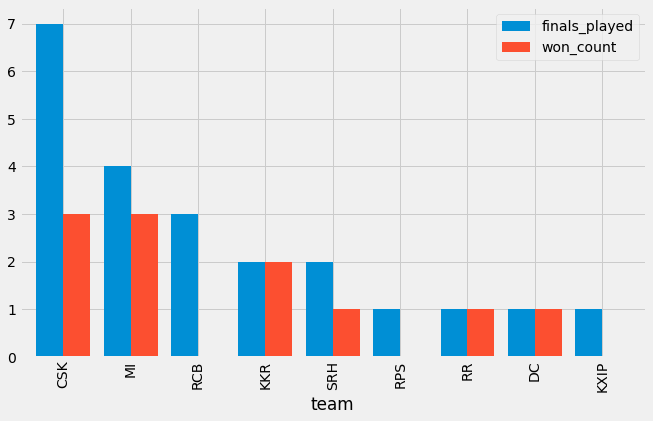

In [72]:
finals=df_matches.drop_duplicates(subset=['season'],keep='last')
finals=finals[['id','season','city','team1','team2','toss_winner','toss_decision','winner']]
most_finals=pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'},axis=1,inplace=True)
xyz=finals['winner'].value_counts().reset_index()
most_finals=most_finals.merge(xyz,left_on='team',right_on='index',how='outer')
most_finals=most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
most_finals.set_index('team',inplace=True)
most_finals.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)
most_finals.plot.bar(width=0.8)
mlt.gcf().set_size_inches(10,6)
mlt.show()

### Do Toss Winners Win Finals?

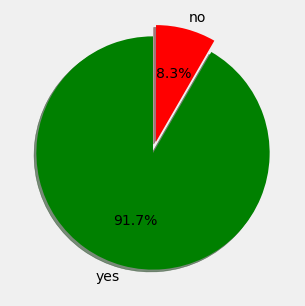

In [74]:
df=finals[finals['toss_winner']==finals['winner']]
slices=[len(finals),(9-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,colors=['G','R'],explode=(0,0.1),autopct='%1.1f%%')
fig = mlt.gcf()
fig.set_size_inches(5,5)
mlt.show()

### Batting Or Fielding For Toss Winners

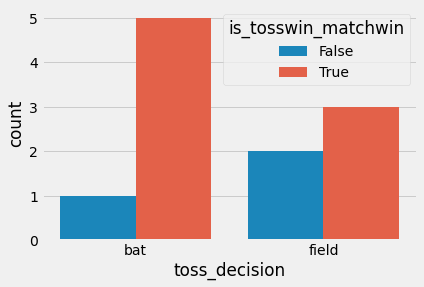

In [75]:
finals['is_tosswin_matchwin']=finals['toss_winner']==finals['winner']
sns.countplot(x='toss_decision',hue='is_tosswin_matchwin',data=finals)
mlt.show()